# *k*-Means Clustering

In [1]:
%matplotlib inline

import csv
import numpy as np
from matplotlib import pyplot
from sklearn import cluster

#### Primero cargamos el csv y lo cargamos en un array de numpy

In [2]:
data = []
with open('geyser_data.csv', 'r') as csvfile:
    csvfile.readline()
    for line in csvfile:
        eruption_time, waiting_time = str(line).split(',')
        data.append([float(eruption_time), float(waiting_time)])

data = np.array(data)

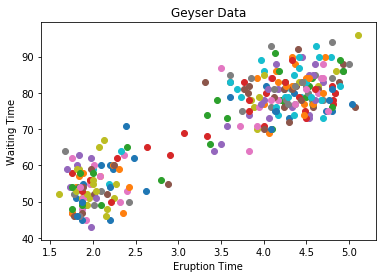

In [3]:
for eruption_time, waiting_time in data:
    pyplot.scatter(eruption_time, waiting_time)

pyplot.title('Geyser Data')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()

#### Del gráfico deducimos que los datos se pueden dividir en 2 grupos. Usaremos `k = 2` para entrenar nuestro modelo

In [4]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Después de entrenar nuestro modelo, podemos obtener el centroide de cada cluster

In [5]:
centroids = kmeans.cluster_centers_

print(centroids)

[[  2.09433     54.75      ]
 [  4.29793023  80.28488372]]


#### Podemos ver la etiqeta asignada a cada punto

In [6]:
labels = kmeans.predict(data)

print(labels)

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


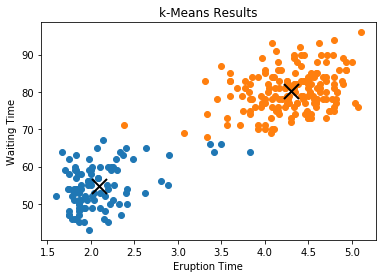

In [7]:
for each in range(k):
    selected_data = data[np.where(labels==each)]
    pyplot.plot(selected_data[:, 0], selected_data[:, 1], 'o')
    lines = pyplot.plot(centroids[each, 0], centroids[each, 1], 'kx')
    pyplot.setp(lines, markersize=15.0, markeredgewidth=2.0)

pyplot.title('k-Means Results')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()